# Problem Set #3

## Problem 1

### 1.(a)

In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.interpolate as intpl
import matplotlib.pyplot as plt

In [2]:
# Set up the parameters
beta = 0.9
gamma = 2.2
W_min = 0.1
W_max = 10.0
W_size = 30

# The discretized values of W
W_vec = np.linspace(W_min, W_max, W_size)

In [3]:
# Set up the distribution of the stochastic term. 
eps_vec = np.array([-1.40, -0.55, 0.0, 0.55, 1.4])
eps_prob = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
eps_size = eps_vec.shape[0]

In [4]:
# Define the CRRA utility function
def util_CRRA(W, W_pr, gamma):
    # Define CRRA utility function
    c = W - W_pr
    util = (c ** (1 - gamma) - 1) / (1 - gamma)
    
    return util

In [5]:
# Define the negative value function for minimization
def neg_V_iid(W_pr, *args):
    W, eps, util, Exp_V_t_interp, gamma, beta = args
    Vtm1 = np.exp(eps) * util(W, W_pr, gamma) + beta * Exp_V_t_interp(W_pr)
    neg_Vtm1 = -Vtm1
    return neg_Vtm1

In [6]:
# Perform value function iteration. 

V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    # Integrate out eps_pr from V_init
    Exp_V = V_init @ eps_prob.reshape((eps_size, 1))
    
    # Interpolate expected value function
    Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                   fill_value='extrapolate')

    for eps_ind in range(eps_size):
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                           args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
#     print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)
    
V_1 = V_new.copy()
psi_1 = psi_mat.copy()

### 1.(c)

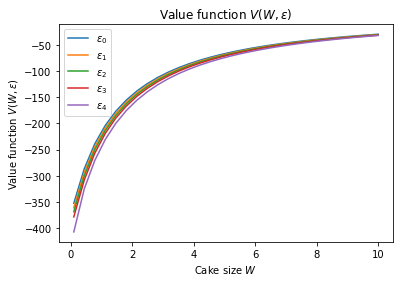

In [16]:
# Plot the resulting value functions
for eps_ind in range(eps_size): 
    plt.plot(W_vec, V_1[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.title('Value function $V(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W,\epsilon)$')
plt.legend()

### 1.(c)

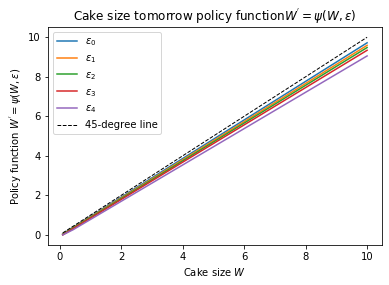

In [12]:
# Plot the resulting policy function
for eps_ind in range(eps_size): 
    plt.plot(W_vec, psi_1[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Cake size tomorrow policy function' +
          '$W^{\'}=\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{\'}=\psi(W,\epsilon)$')
plt.legend()

## Problem2

### 2.(a)

In [19]:
# Set up the parameters
W_min = 0.1
W_max = 10.0
W_size = 30

# The discretized values of W
W_vec = np.linspace(W_min, W_max, W_size)

In [20]:
eps_vec = np.array([-1.40, -0.55, 0.0, 0.55, 1.4])
trans_mat = np.array([[0.40, 0.28, 0.18, 0.10, 0.04],
                      [0.20, 0.40, 0.20, 0.13, 0.07],
                      [0.10, 0.20, 0.40, 0.20, 0.10],
                      [0.07, 0.13, 0.20, 0.40, 0.20],
                      [0.04, 0.10, 0.18, 0.28, 0.40]])

In [21]:
V_init = np.zeros((W_size, eps_size))
V_new = V_init.copy()

VF_iter = 0
VF_dist = 10
VF_maxiter = 200
VF_mindist = 1e-8

while (VF_iter < VF_maxiter) and (VF_dist > VF_mindist):
    VF_iter += 1
    V_init = V_new.copy()
    V_new = np.zeros((W_size, eps_size))
    psi_mat = np.zeros((W_size, eps_size))
    
    

    for eps_ind in range(eps_size):
        # Calculate expected value, integrate out epsilon prime
        trans_mat_ind = trans_mat[eps_ind, :]
        Exp_V = V_init @ trans_mat_ind.reshape((eps_size, 1))
        
        # Interpolate expected value function
        Exp_V_interp = intpl.interp1d(W_vec, Exp_V.flatten(), kind='cubic',
                                      fill_value='extrapolate')
        for W_ind in range(W_size):
            W = W_vec[W_ind]
            eps = eps_vec[eps_ind]
            V_args = (W, eps, util_CRRA, Exp_V_interp, gamma, beta)
            results1 = opt.minimize_scalar(neg_V_iid, bounds=(1e-10, W - 1e-10),
                                           args=V_args, method='bounded')
            V_new[W_ind, eps_ind] = -results1.fun
            psi_mat[W_ind, eps_ind] = results1.x
    
    VF_dist = ((V_init - V_new) ** 2).sum()
#     print('VF_iter=', VF_iter, ', VF_dist=', VF_dist)
    
V_2 = V_new.copy()
psi_2 = psi_mat.copy()

### 2.(b)

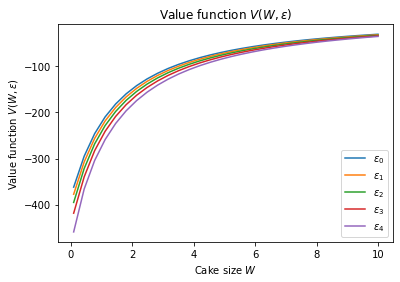

In [22]:
# Plot the resulting value functions
for eps_ind in range(eps_size): 
    plt.plot(W_vec, V_2[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.title('Value function $V(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Value function $V(W,\epsilon)$')
plt.legend()

### 2.(c)

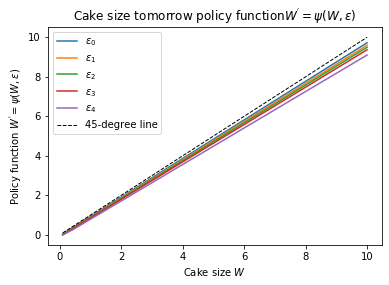

In [25]:
# Plot the resulting policy functions
for eps_ind in range(eps_size): 
    plt.plot(W_vec, psi_2[:, eps_ind], label=f'$\epsilon_{eps_ind}$')
plt.plot(W_vec, W_vec, color='black', linewidth=1, linestyle='--',
         label='45-degree line')
plt.title('Cake size tomorrow policy function' +
          '$W^{\'}=\psi(W,\epsilon)$')
plt.xlabel('Cake size $W$')
plt.ylabel('Policy function $W^{\'}=\psi(W,\epsilon)$')
plt.legend()